In [43]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input, Activation, Flatten
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import cv2
from sklearn.model_selection import train_test_split

In [2]:
current_directory = os.getcwd()

In [3]:
current_directory

'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\Dogs Cats'

In [5]:
dog_path = os.path.join(current_directory, 'PetImages', 'Dog')

In [6]:
cat_path = os.path.join(current_directory, 'PetImages', 'Cat')

In [7]:
dog_path

'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\Dogs Cats\\PetImages\\Dog'

In [8]:
cat_path

'C:\\Users\\sruji\\Downloads\\DS\\ML Practice\\Dogs Cats\\PetImages\\Cat'

In [15]:
def get_images(folder, label, size=(64,64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            filepath = os.path.join(folder, filename)
            img = cv2.imread(filepath)
            if img is None:
                print(f'{filepath}:{filename} Image not loaded')
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, size)
            img = img/255.0
            images.append(img)
            labels.append(label)

        if len(images) > 2000:
            break
    images = np.array(images).reshape(-1, size[0], size[1], 1)
    labels = np.array(labels)
    return images, labels

In [16]:
X_cats, y_cats = get_images(cat_path, 0)

C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Cat\10125.jpg:10125.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Cat\10404.jpg:10404.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Cat\10501.jpg:10501.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Cat\10820.jpg:10820.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Cat\11210.jpg:11210.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Cat\11565.jpg:11565.jpg Image not loaded


In [17]:
X_dogs, y_dogs = get_images(dog_path, 1)

C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Dog\10158.jpg:10158.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Dog\10401.jpg:10401.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Dog\10747.jpg:10747.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Dog\10797.jpg:10797.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Dog\11410.jpg:11410.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Dog\11675.jpg:11675.jpg Image not loaded
C:\Users\sruji\Downloads\DS\ML Practice\Dogs Cats\PetImages\Dog\11702.jpg:11702.jpg Image not loaded


In [18]:
X_cats.shape

(2001, 64, 64, 1)

In [19]:
X_dogs.shape

(2001, 64, 64, 1)

In [21]:
X = np.vstack((X_cats, X_dogs))

In [23]:
y = np.hstack((y_cats, y_dogs))

In [24]:
X.shape

(4002, 64, 64, 1)

In [25]:
y.shape

(4002,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape

(3201, 64, 64, 1)

In [29]:
X_test.shape

(801, 64, 64, 1)

In [30]:
y_train.shape

(3201,)

In [35]:
labels = ['Cat', 'Dog']

Cat


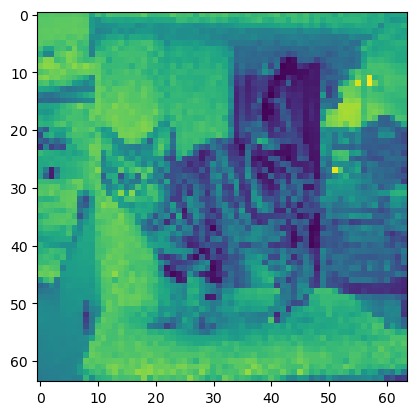

In [36]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx])
print(labels[y_train[idx]])

### Model

In [44]:
i = Input(shape=(X_train[0].shape))
x = Conv2D(32, (3,3), use_bias=False)(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(32, (3,3), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), use_bias=False)(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3,3), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), use_bias=False)(i)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(128, (3,3), use_bias=False)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)

In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.9283 - loss: 0.1851 - val_accuracy: 0.6280 - val_loss: 1.0306
Epoch 2/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8732 - loss: 0.2987 - val_accuracy: 0.6966 - val_loss: 0.7788
Epoch 3/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.9465 - loss: 0.1477 - val_accuracy: 0.6629 - val_loss: 1.0113
Epoch 4/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9695 - loss: 0.0937 - val_accuracy: 0.5206 - val_loss: 3.2055
Epoch 5/5
101/101 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.6804 - loss: 1.0403 - val_accuracy: 0.6954 - val_loss: 0.5973


In [51]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 62, 62, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │       147,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,398,149 (676.72 MB)

 Trainable params: 59,132,545 (225.57 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 118,265,092 (451.15 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted:  Cat
Original:  Cat


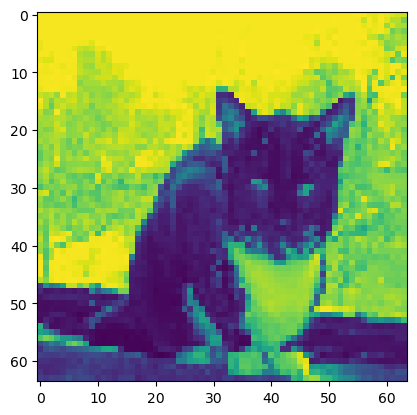

In [70]:
idx = random.randint(0, len(X_test)-1)
img = np.expand_dims(X_test[idx], axis=0)
prediction = model.predict(img)
prediction_class = prediction >0.5
if prediction_class[0][0]==False:
    print("Predicted: ",labels[0])
else:
    print("Predicted: ",labels[1])
print("Original: ", labels[y_test[idx]])
plt.imshow(X_test[idx])
plt.show()